# Spotify Data Analysis

In this notebook we will be diving into a dataset of 8,500+ Spotify tracks to understand what drives song popularity.

We'll examine how features like artist popularity, followers, genres and even explicit content impact a track's success.

Also, i will train different machine learning models to predict whether a song could be a "hit" based on its attributes.





Let's start by loading and understanding the data that we have.

In [ ]:
#Basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Dataset

df = pd.read_csv('/content/spotify_data clean.csv')
#Quick look
df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [ ]:
df.info()

#Checking null values (if any)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

,0
track_id,0
track_name,0
track_number,0
track_popularity,0
explicit,0
artist_name,3
artist_popularity,0
artist_followers,0
artist_genres,3361
album_id,0


As we can see, the dataset contains 15 columns and 8500 rows.

Column "artist_genres" contains null values which makes sense since not every artist is categorized into a clear genre.





Now, we will visualise the data and see what patterns emerge.

# Exploring the Spotify Dataset

Let's start with the popularity distribution and then move into the effects caused to track popularity by genres, artist popularity, and song characteristics like duration and explicit content.

The goal is to understand what makes a track stand out.

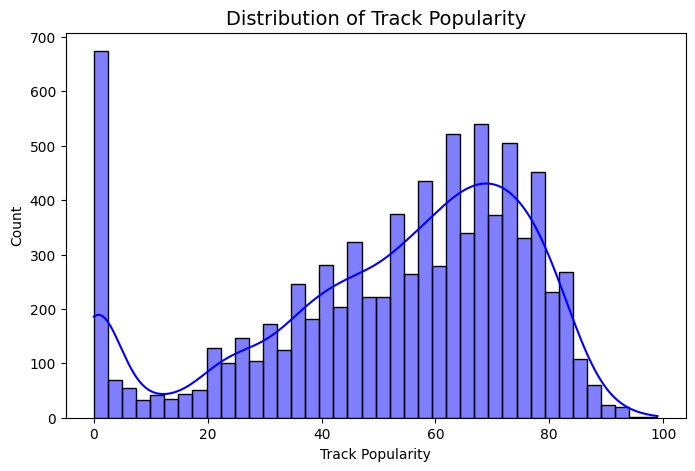

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['track_popularity'], bins=40, kde=True, color='blue')
plt.title("Distribution of Track Popularity", fontsize=14)
plt.xlabel("Track Popularity")
plt.ylabel("Count")
plt.show()

As we can see, most songs have low to medium popularity. There is a small portion of songs with Track Popularity > 70+ and this represents major hit tracks or popular artists.

/tmp/ipython-input-725856136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="mako")


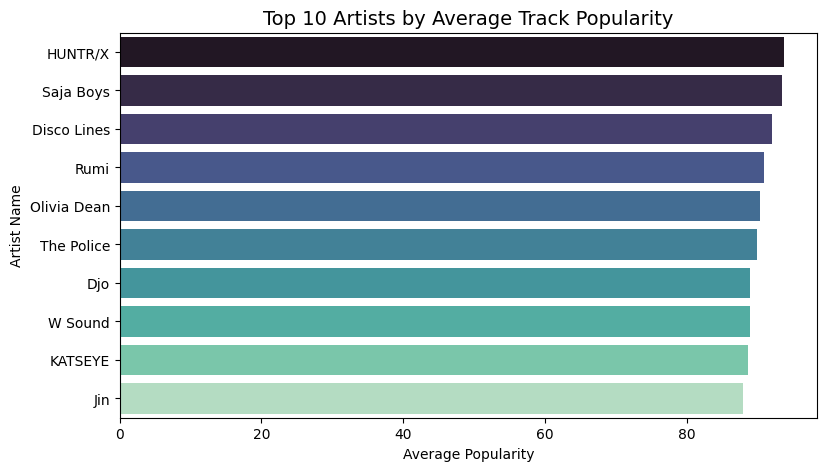

In [ ]:
top_artists = (df.groupby('artist_name'))['track_popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(9,5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="mako")
plt.title("Top 10 Artists by Average Track Popularity", fontsize=14)
plt.xlabel("Average Popularity")
plt.ylabel("Artist Name")
plt.show()

These are the top 10 artists releasing popular tracks. It's interesting to see how some artists with fewer folowers manage to get high average popularity, possible due to the release of viral tracks.


/tmp/ipython-input-3545967197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="mako")


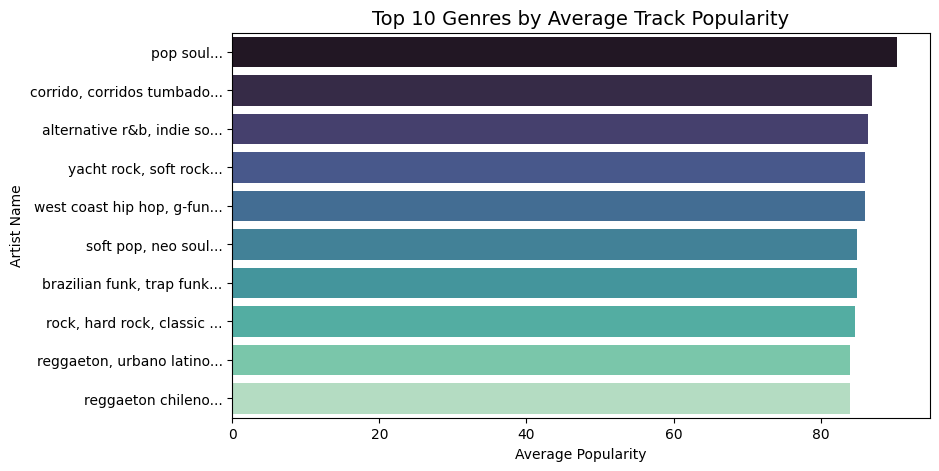

In [ ]:
top_genres = (df.groupby('artist_genres'))['track_popularity'].mean().sort_values(ascending=False).head(10)
top_genres.index = top_genres.index.str.slice(0, 25) + "..."

plt.figure(figsize=(9,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="mako")
plt.title("Top 10 Genres by Average Track Popularity", fontsize=14)
plt.xlabel("Average Popularity")
plt.ylabel("Artist Name")
plt.show()



Many pop genres dominate the list, indicating strong relation between this genre and popularity. But, many other genres appear on the list showing us how diverse Spotify's catalog is.

/tmp/ipython-input-1265742368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='explicit', y='track_popularity', data=df, palette='pastel')


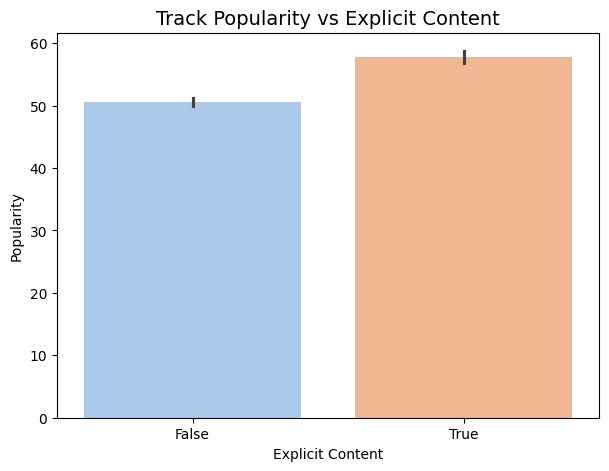

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='explicit', y='track_popularity', data=df, palette='pastel')
plt.title("Track Popularity vs Explicit Content", fontsize=14)
plt.xlabel("Explicit Content")
plt.ylabel("Popularity")
plt.show()

From the above barplot we can see that explicit songs have higher popularity although the difference isn't big.

Continuing, we will inspect on how track duration affects popularity.

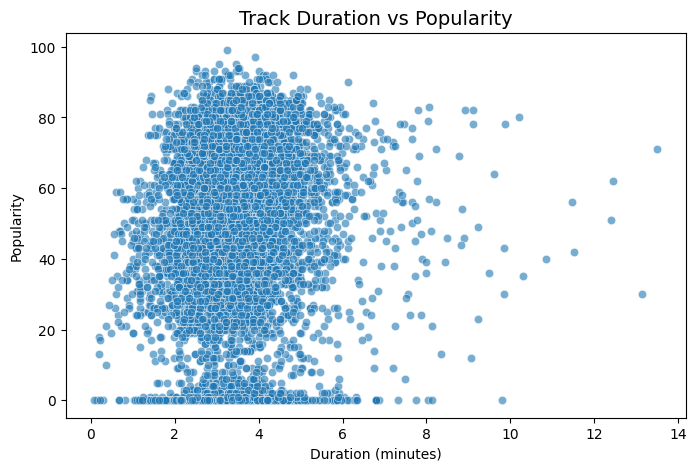

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='track_duration_min', y='track_popularity', data=df, alpha=0.6)
plt.title("Track Duration vs Popularity", fontsize=14)
plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity")
plt.show()

Most songs tend to be 2 to 4 minutes long. Also most popular tracks are in this space too.

There is no linear relationship, but extremely short or long tracks tend to be less popular.



/tmp/ipython-input-647796504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='album_type', y='track_popularity', estimator='mean', palette='rocket')


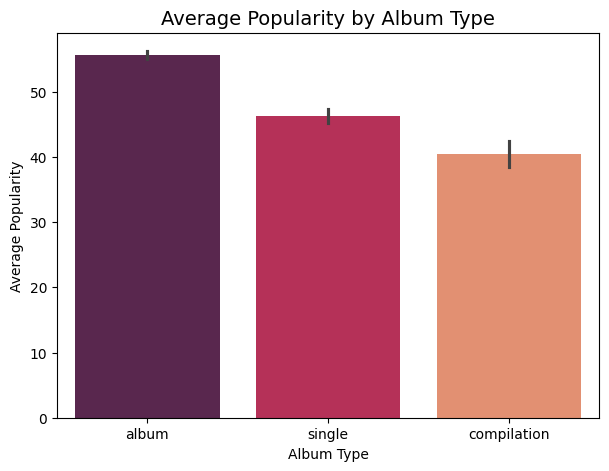

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='album_type', y='track_popularity', estimator='mean', palette='rocket')
plt.title("Average Popularity by Album Type", fontsize=14)
plt.xlabel("Album Type")
plt.ylabel("Average Popularity")
plt.show()

Also, tracks released in albums tend to be more successful than singles. This may be due to stronger promotion or simply because more established artists are typically the ones who release full albums.

At last we will dive into the corellation between the numerical data so we can have a better look at the relationship between attributes.

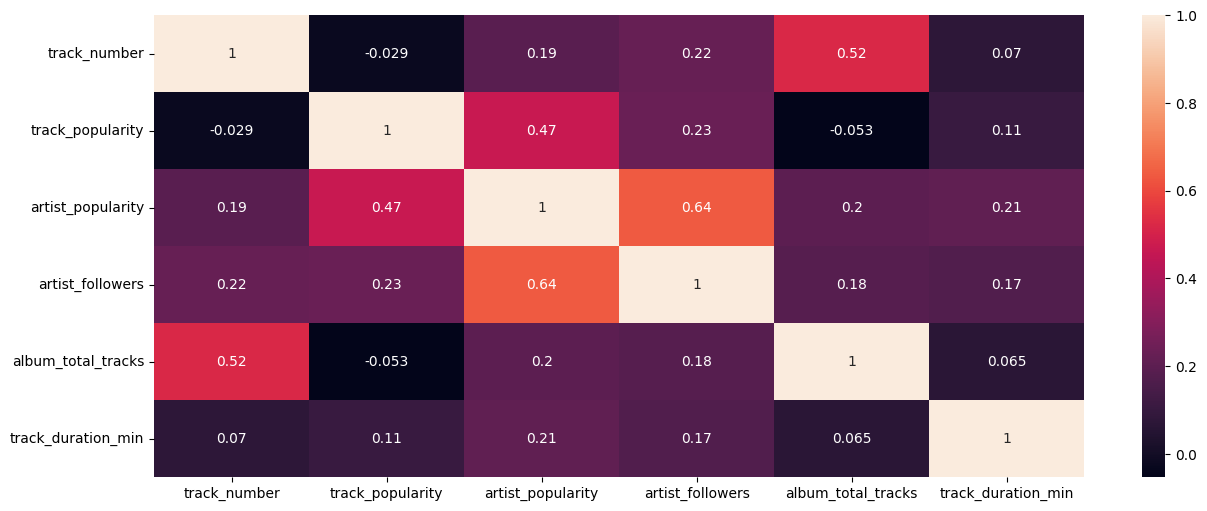

,track_number,track_popularity,artist_popularity,artist_followers,album_total_tracks,track_duration_min
track_number,1.000000,-0.028513,0.190696,0.222508,0.520070,0.070122
track_popularity,-0.028513,1.000000,0.466903,0.232019,-0.053461,0.105560
artist_popularity,0.190696,0.466903,1.000000,0.635579,0.199335,0.207769
artist_followers,0.222508,0.232019,0.635579,1.000000,0.183718,0.172140
album_total_tracks,0.520070,-0.053461,0.199335,0.183718,1.000000,0.064824
track_duration_min,0.070122,0.105560,0.207769,0.172140,0.064824,1.000000


In [ ]:
numerical_df = df.select_dtypes(include='number')
plt.figure(figsize=(15,6))
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()
numerical_df.corr()

From the heatmap we can clearly see:


*   Artist Popularity has a moderate positive correlation with track popularity, which makes sense since well-known artists tend to release more streamed songs.
*   Artist's followers seem to not have a big correlation with track popularity, meaning that follower count doesnt translate to success songs.



Let's summarise what we have learnt so far:


*   Most songs on Spotify are between low and medium popularity.
*   The Most popular genre is Pop.


*   Most popular tracks are on the shorter side and fall under the category of explicit.
*   Follower count isn't an indicator of success.


*  Tracks part of an album tend to be more popular overall.








# Preprocessing Stage

Now that we are done with visualising our data, we will proceed with the preprocessing stage. Since the dataset is mostly clean, i will make some adjustments and feature engineering.

In [ ]:
# Converting release date to datetime
df['album_release_date'] = pd.to_datetime(df['album_release_date'], format = "%Y-%m-%d")

#Extracting useful date components
df['release_year'] = df['album_release_date'].dt.year
df['release_month'] = df['album_release_date'].dt.month

#Filling null values
df['artist_genres'] = df['artist_genres'].fillna("Unknown")

df.head(10)


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min,release_year,release_month
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55,2025,10
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07,2025,10
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,Unknown,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55,2025,10
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69,2025,10
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39,2025,10
5,4ccpCcZYseq8VrPMK1EDs0,BLEED,1,2,False,Minzie,46,7218,dark r&b,2NQv9p3ZQW0Ed1LB9enix8,BLEED,2025-10-30,3,single,2.76,2025,10
6,3QoQ3HqXTAjgEl9LbNMbYp,Te Procuro na Cidade,1,20,False,AZERDK,30,1657,Unknown,1PpuOsLjPWshDLxkr0oHeU,Te Procuro na Cidade,2025-10-30,1,single,4.12,2025,10
7,1YEZbdT417SfolPQzaoHs2,come closer,1,27,False,Rumelis,49,8802,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.53,2025,10
8,4pZ949nFW5SurwzE0TSe7I,Cupido Vagabundo,1,16,False,Toni dos Anjos,6,475,Unknown,60DLQZkzpvDvVfvEC6VOJM,Cupido Vagabundo,2025-10-30,2,single,2.92,2025,10
9,0L0LgwFZ7UtBnRNQvSBty6,LET’S GO!,1,33,True,PsychoYP,48,154802,"nigerian drill, alté, afro adura, afrobeats, a...",3ARxksm8CspGeAaZZB1v2w,LET’S GO!,2025-10-28,1,single,2.40,2025,10


I extracted the release year and month so we can analyze music trends over time.

I will now drop the attributes that don't seem to be useful for the prediction of a "hit" track and adjust the "explicit" column.

In [ ]:
df.drop(['track_id', 'track_name', 'track_number', 'artist_name', 'album_id', 'album_name', 'album_release_date', 'album_total_tracks'], axis=1, inplace=True)

#Converting "explicit" column into binary format
df['explicit'] = df['explicit'].astype(int)

This gives us a binary target variable where 1 = Hit song (popularity > 60),  0 = Not a hit.

Also, since we have some categorical columns, we need to deal with them as we need them for the model training.

I'll use the OneHotEncoder class from scikit-learn to transform the categorical data to numerical.

Before this, we need to split the data set to prevent data leakage. Since i'll do some hyperparameter tuning later, the data set will be split accordingly.

In [ ]:
# Define a hit song as one with popularity > 60
df['is_hit'] = (df['track_popularity'] > 60).astype(int)

features = ['album_type', 'explicit', 'artist_popularity', 'artist_followers', 'artist_genres', 'track_duration_min', 'release_year', 'release_month']
X=df[features]
y = df['is_hit']



df.head()

,track_popularity,explicit,artist_popularity,artist_followers,artist_genres,album_type,track_duration_min,release_year,release_month,is_hit
0,0,1,77,2812821,moombahton,album,1.55,2025,10,0
1,0,1,64,2363438,"country hip hop, southern hip hop",single,3.07,2025,10,0
2,4,1,48,193302,Unknown,single,2.55,2025,10,0
3,30,1,77,2813710,moombahton,album,1.69,2025,10,0
4,0,1,48,8682,dark r&b,single,2.39,2025,10,0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Spliting data set into train + val (80/20)
X_trainval, X_val, y_trainval, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

# Spliting X_trainval data set into train + test for the testing after hyperparameter tuning (75/25)
X_train, X_test, y_train, y_test = train_test_split(X_trainval, y_trainval, test_size = 0.25, random_state=42)

categorical_columns = ['artist_genres', 'album_type']
numerical_columns = ['explicit', 'artist_popularity', 'artist_followers', 'track_duration_min', 'release_year', 'release_month']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#Pipeline for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Store the processed data
X_trainval_processed = preprocessor.fit_transform(X_trainval)
X_val_processed = preprocessor.transform(X_val)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Models we are going to train
knn = KNeighborsClassifier()
lrc = LogisticRegression()
mlp = MLPClassifier()
svc = SVC()
dtc = tree.DecisionTreeClassifier()
rfc = RandomForestClassifier()
classifier_list = [knn, lrc, mlp, svc, dtc, rfc]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

#Training different models
model_list = []
for classifier in classifier_list:
  classifier.fit(X_trainval_processed, y_trainval)
  model_list.append(classifier)

#Model predictions
model_preds = []
for model in model_list:
  model_preds.append(model.predict(X_val_processed))

#Printing results
for model, model_prediction in zip(model_list, model_preds):
    print(model, 'f1-score', f'{f1_score(y_val, model_prediction,)}')
    print(classification_report(y_val, model_prediction))

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


KNeighborsClassifier() f1-score 0.7279693486590039
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       929
           1       0.73      0.72      0.73       788

    accuracy                           0.75      1717
   macro avg       0.75      0.75      0.75      1717
weighted avg       0.75      0.75      0.75      1717

LogisticRegression() f1-score 0.7214285714285714
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       929
           1       0.68      0.77      0.72       788

    accuracy                           0.73      1717
   macro avg       0.73      0.73      0.73      1717
weighted avg       0.73      0.73      0.73      1717

MLPClassifier() f1-score 0.7211660329531052
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       929
           1       0.72      0.72      0.72       788

    accuracy                          

This gives us a classification report, showing **precision**, **recall**, **f1-score** and **accuracy**.

We can see that the SupportVectorClassifier performed the best which is usual since it can capture non-linear relationships between attributes and the targeted label.

We will proceed now with the Hyperparameter tuning, optimizing our models.

In [ ]:
#Hyperparameter tuning / searching for best model
from sklearn.model_selection import GridSearchCV

#kNN
knn_search_space = {
    'n_neighbors': [3, 5, 7],
    'metric':['euclidean', 'manhattan']

    }
estimator = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator, knn_search_space, cv=5, scoring = 'f1')
knn_grid.fit(X_trainval_processed, y_trainval)

#LR
lrc_search_space = {
    'penalty': ['l1', 'l2'],
        'C': [1, 10, 100, 1000, 10000],
        'max_iter': [1000],


}
estimator = LogisticRegression()
lrc_grid = GridSearchCV(estimator, lrc_search_space, scoring='f1')
lrc_grid.fit(X_trainval_processed, y_trainval)

#MLP
mlp_search_space = {
    'hidden_layer_sizes': [(50,), (100,), (64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'solver': ['adam'],
    'batch_size': [1024],
    'learning_rate_init': [0.001, 0.01],
    'max_iter' : [1000]
}
estimator = MLPClassifier()
mlp_grid = GridSearchCV(estimator, mlp_search_space, scoring='f1')
mlp_grid.fit(X_trainval_processed, y_trainval)

#rfc
rfc_search_space = [
    {
        'n_estimators': [100,200],
        'criterion': ['gini', 'entropy',],
        'max_depth': [None, 5, 10, 20, 30],
        'class_weight': ['balanced'],
        'min_samples_split': [2, 10, 100, 500],
        'min_samples_leaf':  [1, 20, 50, 100, ],
    },
]

estimator = RandomForestClassifier()
rfc_grid = GridSearchCV(estimator, rfc_search_space, scoring='f1')
rfc_grid.fit(X_trainval_processed, y_trainval)

#dtc
dtc_search_space = [
    {
        'criterion': ['gini', 'entropy',],
        'splitter': ['best', 'random',],
        'max_depth': [None, 5, 10, 20, 30],
        'min_samples_split': [2, 10, 100, 500],
        'min_samples_leaf':  [1, 20, 50, 100, ],
    }
]
estimator = tree.DecisionTreeClassifier()
dtc_grid = GridSearchCV(estimator, dtc_search_space, scoring='f1')
dtc_grid.fit(X_trainval_processed, y_trainval)

#svc
svc_search_space = {
         'C': [1, 10, 100, 1000],
        'kernel': ['rbf',],
        'gamma': [ 1e-3, 1e-4,],
    }

estimator = SVC()
svc_grid = GridSearchCV(estimator, svc_search_space, scoring='f1')
svc_grid.fit(X_trainval_processed, y_trainval)





/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='f1')

In [ ]:
#Best parameters and predictions of optimized models
fitted_grids = [knn_grid, lrc_grid, mlp_grid, svc_grid, dtc_grid, rfc_grid ]

best_models = []
best_model_preds = []
for fitted_grid in fitted_grids:
  best_params = fitted_grid.best_params_
  print('\n\n', best_params)

  best_model = fitted_grid.best_estimator_
  print(best_model)
  best_models.append(best_model)

  preds = best_model.predict(X_val_processed)
  best_model_preds.append(preds)




 {'metric': 'manhattan', 'n_neighbors': 7}
KNeighborsClassifier(metric='manhattan', n_neighbors=7)


 {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
LogisticRegression(C=1, max_iter=1000)


 {'activation': 'relu', 'alpha': 0.001, 'batch_size': 1024, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'adam'}
MLPClassifier(alpha=0.001, batch_size=1024, hidden_layer_sizes=(50,),
              max_iter=1000)


 {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 2, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=10, min_samples_leaf=20)


 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, min_samples_split=10, n_estimators=200)


In [ ]:
#Results
for model, preds in zip(best_models, best_model_preds):
    print(model, 'f1-score', f'{f1_score(y_val, preds,):.5f}')
    print(classification_report(y_val, preds))

KNeighborsClassifier(metric='manhattan', n_neighbors=7) f1-score 0.73042
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       929
           1       0.74      0.72      0.73       788

    accuracy                           0.76      1717
   macro avg       0.75      0.75      0.75      1717
weighted avg       0.76      0.76      0.76      1717

LogisticRegression(C=1, max_iter=1000) f1-score 0.72143
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       929
           1       0.68      0.77      0.72       788

    accuracy                           0.73      1717
   macro avg       0.73      0.73      0.73      1717
weighted avg       0.73      0.73      0.73      1717

MLPClassifier(alpha=0.001, batch_size=1024, hidden_layer_sizes=(50,),
              max_iter=1000) f1-score 0.73988
              precision    recall  f1-score   support

           0       0.79      0.74      0.76   

In [ ]:
#Preprocessing of second split
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

#Predicting on new set

model_preds1 = []
for model in best_models:

  y_pred1 = model.predict(X_test_processed)
  model_preds1.append(y_pred1)

#Final Results
for model, model_prediction in zip(best_models, model_preds1):
    print(model, 'f1-score', f'{f1_score(y_test, model_prediction,)}')
    print(classification_report(y_test, model_prediction))



KNeighborsClassifier(metric='manhattan', n_neighbors=7) f1-score 0.7819354838709678
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       956
           1       0.77      0.80      0.78       761

    accuracy                           0.80      1717
   macro avg       0.80      0.80      0.80      1717
weighted avg       0.80      0.80      0.80      1717

LogisticRegression(C=1, max_iter=1000) f1-score 0.7466986794717887
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       956
           1       0.69      0.82      0.75       761

    accuracy                           0.75      1717
   macro avg       0.76      0.76      0.75      1717
weighted avg       0.77      0.75      0.75      1717

MLPClassifier(alpha=0.001, batch_size=1024, hidden_layer_sizes=(50,),
              max_iter=1000) f1-score 0.809206541490006
              precision    recall  f1-score   support

           0  

The second data split was derived from the same dataset but was not used in model fitting or hyperparameter tuning.

Therefore, the improved results reflect genuine generalization to a different subset of the same data distribution.

As we can see, the most improved model was the RandomForestClassifier and that happens because this classifier is sensitive to its hyperparameters and as a result it gets the most out of the optimization.



[[773 183]
 [155 606]]
[[673 283]
 [139 622]]
[[734 222]
 [ 93 668]]
[[618 338]
 [ 75 686]]
[[566 390]
 [ 59 702]]
[[642 314]
 [ 29 732]]


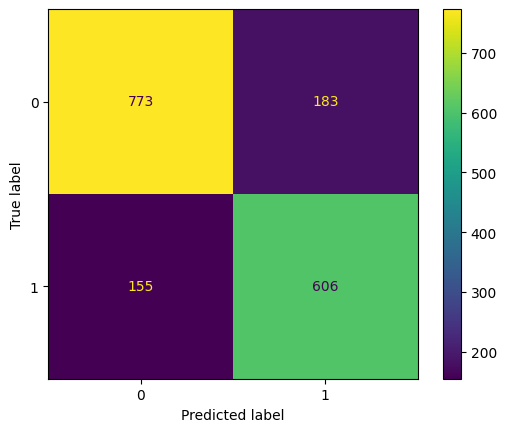

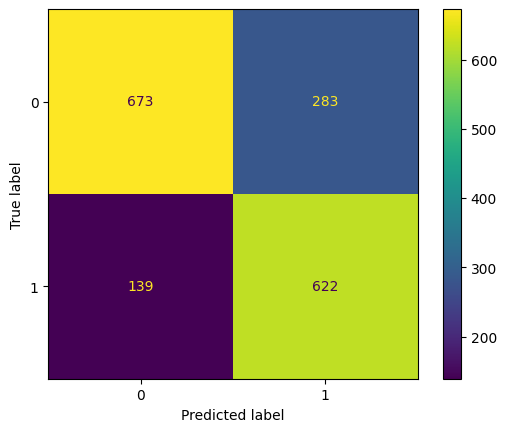

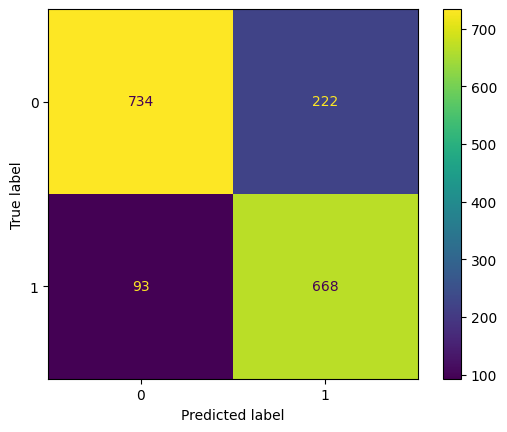

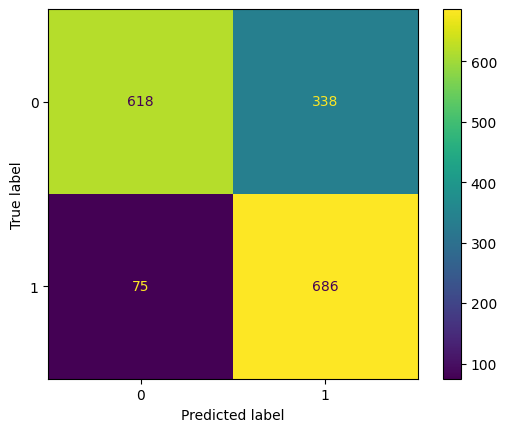

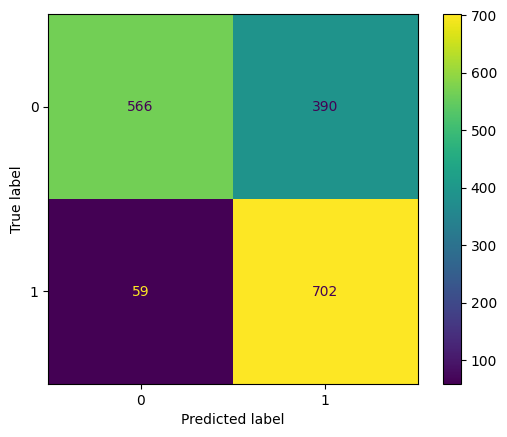

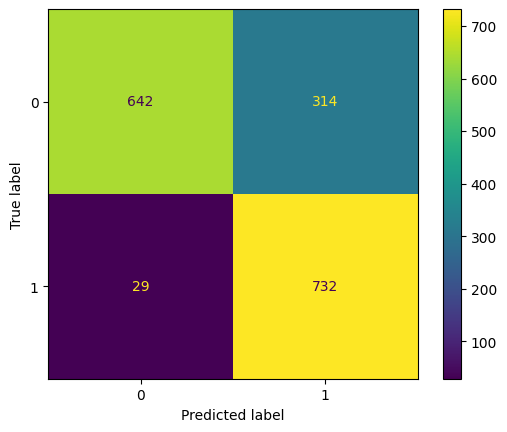

In [ ]:
#Visualizing
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
for model, model_prediction in zip(best_model, model_preds1):
    cm = confusion_matrix(y_test, model_prediction)
    matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
    matrix.plot()
    print(cm)

# Model Evaluation
The optimized RandomForestClassifier performs strongly and shows balanced and reliable ability to generalize. The model achieves an overall **F1-score : 0.81**, indicating that it handles both classes effectively.

Class 0 (not a "hit" track) is predicted with very high precision but lower recall, meaning the model is conservative when labeling this class and avoids false positives. On the other hand, Class 1 ("hit" track) is predicted with high recall and moderate precision, meaning the model captures almost all instances of this class but accepts more false positives.

RandomForestClassifier outperforms every other classifier, indicating complex relationship among features, although track success is difined by more factors, such as lyrics, emotions and marketing.

# Final Thoughts
This project explored how different attributes affect a track's popularity and how hyperparameter tuning plays a significant role in optimizing a model.

From Exploratory Data Analysis and model evaluation a few things stand out:


*   Artist popularity, track duration and explicity play a role in track's popularity.
*   Most songs fall into low-medium popularity.

*   Albums perform better than singles.
*   Machine learning models can predict if a song will be a "hit" with good overall results


*   SupportVectorClassifer performed the best before optimization.
*   RandomForestClassifier performed the best after optimization, indicating heavy dependance on hyperparameters


*   Both of the above suggest complex relationship among features.







